In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper_functions as hf


## Load and sanitize dataframe

In [2]:
df = pd.read_csv(hf.FpathRegistry.all_responses)

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(5)
# Conflicting sports
# np.sum(df["volleyball"] & df["basketball"])
# np.sum(df["football"] & df["tennis"])
# df[df["capture_the_flag"] & df["spikeball"]]["nickname"].tolist()


90 entries, of which 70 are PhDs and 20 are postdocs


,nickname,institute,is_postdoc,avail_monday,avail_tuesday,avail_thursday,avail_friday,wants_basketball,basketball,wants_running_sprints,...,spikeball,wants_beer_pong,beer_pong,wants_fooseball,fooseball,wants_ping_pong,ping_pong,num_sports,num_sports_not_avail,late_entry
0,Pushy Bulldog,MPE,False,True,True,True,True,False,False,True,...,True,False,False,False,False,True,True,5,0,False
1,Thankful Kakapo,MPE,False,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,7,0,False
2,Exemplary Cassowary,MPA,False,True,True,True,True,False,False,False,...,True,True,True,False,False,False,False,4,0,False
3,Magnificent Barracuda,MPE,False,True,True,True,True,False,False,True,...,True,True,True,True,True,True,True,9,0,False
4,Dishonest Fangtooth,MPA,False,False,True,True,True,True,False,False,...,True,True,True,True,True,True,True,5,2,False


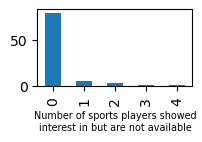

In [3]:
# df.plot.hist("num_sports_not_avail")
fig, ax = plt.subplots(figsize=(2, 1))
df["num_sports_not_avail"].value_counts().sort_index().plot.bar()
plt.xlabel("Number of sports players showed\ninterest in but are not available", size="x-small");


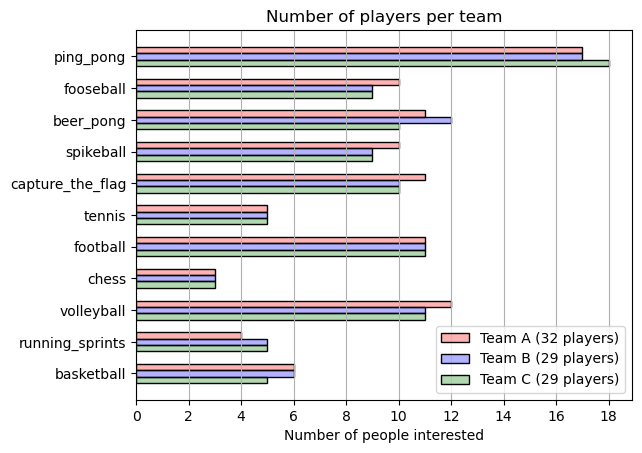

In [4]:
fig, ax = plt.subplots()
for team in hf.ALL_TEAMS:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend();


In [5]:
from ipywidgets import HTML
all_players = pd.concat([team.player_df for team in hf.ALL_TEAMS])
text = ""
for colliding_pairs in [["volleyball", "basketball"], ["football", "tennis"], ["capture_the_flag", "spikeball"]]:
    key_1, key_2 = f"subteam_{colliding_pairs[0]}", f"subteam_{colliding_pairs[1]}"
    sub_df = all_players[all_players[key_1].notna() & all_players[key_2].notna()]
    text += sub_df[["nickname", key_1, key_2]].to_html() + "<br>"
HTML(text)


HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></…

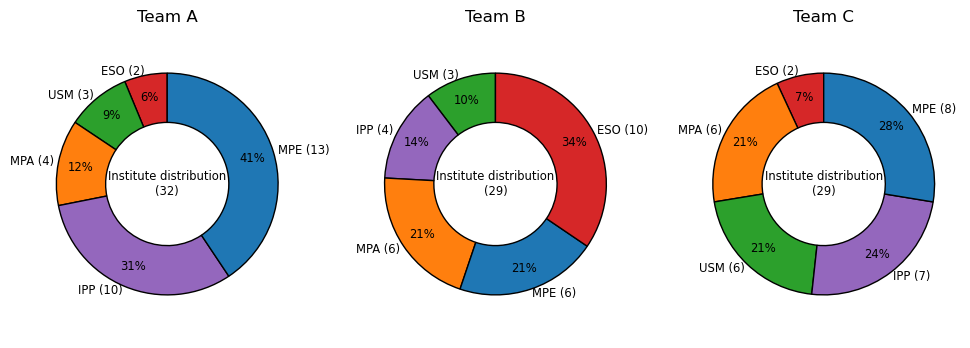

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, hf.ALL_TEAMS):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [21]:
teams[0].get_all_players_for_sport("chess")


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,fooseball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
55,Clever Wombat,IPP,False,True,False,False,True,False,False,False,False,False,True,False,3,True,True,False,True,False
61,Trifling Tarpon,IPP,False,True,False,False,True,False,True,False,False,False,True,False,4,True,True,True,True,False
75,Awkward Cichlid,USM,False,False,False,False,True,False,True,False,True,False,True,False,4,True,True,True,True,False


## Make some plots

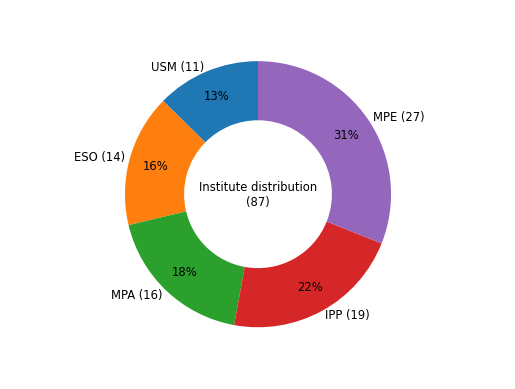

In [148]:
# Distribution of institutes
hf.create_institute_plot(df)


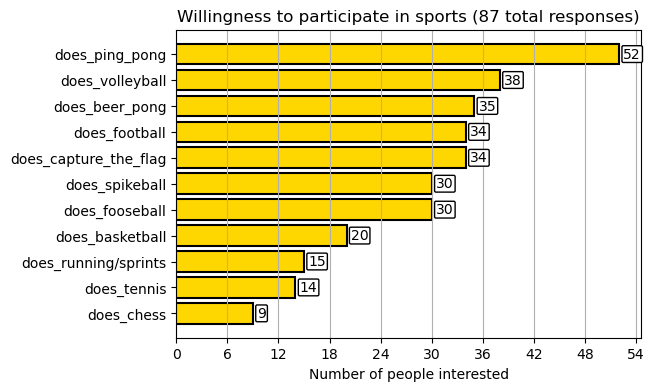

In [10]:
# Overall distribution of sports
fig, ax = plt.subplots(figsize=(6, 4))
hf.create_sports_num_plot(df, annotate_numbers=True, sort_bars=True)
